In [85]:
import pandas as pd
import numba as np
import matplotlib.pyplot as plt
import seaborn as sns


In [86]:
df = pd.read_csv('/content/train.csv')
df.head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,1,1,1,0,1,1,...,f,White-European,no,no,United States,no,7.819715,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,...,f,South Asian,no,no,Australia,no,10.544296,18 and more,?,0
2,3,1,1,1,1,1,1,0,0,1,...,f,White-European,no,no,United Kingdom,no,13.167506,18 and more,Self,1
3,4,0,0,0,1,0,0,0,0,0,...,f,South Asian,no,no,New Zealand,no,1.530098,18 and more,?,0
4,5,0,0,0,0,1,0,0,0,1,...,m,Black,no,yes,Italy,no,7.949723,18 and more,Self,0


In [87]:
df.shape

(800, 22)

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               800 non-null    int64  
 1   A1_Score         800 non-null    int64  
 2   A2_Score         800 non-null    int64  
 3   A3_Score         800 non-null    int64  
 4   A4_Score         800 non-null    int64  
 5   A5_Score         800 non-null    int64  
 6   A6_Score         800 non-null    int64  
 7   A7_Score         800 non-null    int64  
 8   A8_Score         800 non-null    int64  
 9   A9_Score         800 non-null    int64  
 10  A10_Score        800 non-null    int64  
 11  age              800 non-null    float64
 12  gender           800 non-null    object 
 13  ethnicity        800 non-null    object 
 14  jaundice         800 non-null    object 
 15  austim           800 non-null    object 
 16  contry_of_res    800 non-null    object 
 17  used_app_before 

In [89]:
df.isnull().sum()

,0
ID,0
A1_Score,0
A2_Score,0
A3_Score,0
A4_Score,0
A5_Score,0
A6_Score,0
A7_Score,0
A8_Score,0
A9_Score,0


#Here we are going to perform EDA to see insights of our data

# Target Variable Distribution
####Analyze the distribution of the target variable (Class/ASD). Check how balanced the classes are (0: No, 1: Yes).

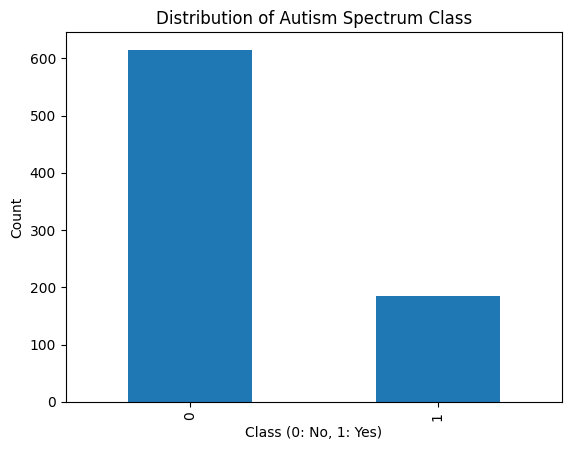

In [90]:
# Here we are going to perform EDA to see insights of our data

# Target variable distribution
df['Class/ASD'].value_counts().plot(kind='bar')
plt.title('Distribution of Autism Spectrum Class')
plt.xlabel('Class (0: No, 1: Yes)')
plt.ylabel('Count')
plt.show()



#Feature Distribution
### Visualize the distribution of key features like age, gender, ethnicity, autism, jaundice, and result.

<Axes: xlabel='ethnicity'>

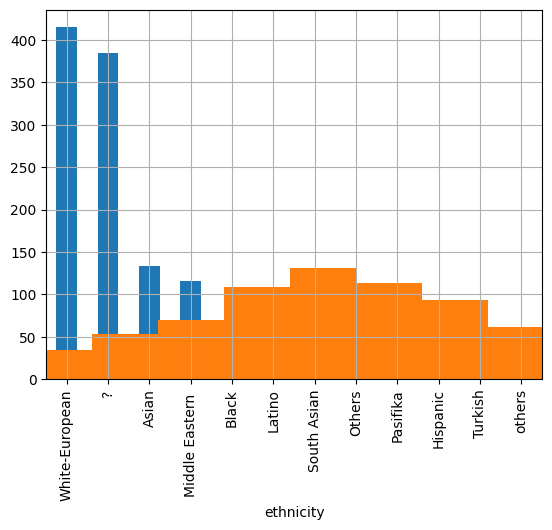

In [91]:
# Plotting distributions
df['age'].hist(bins=20)
df['gender'].value_counts().plot(kind='bar')
df['ethnicity'].value_counts().plot(kind='bar')
df['result'].hist(bins=10)


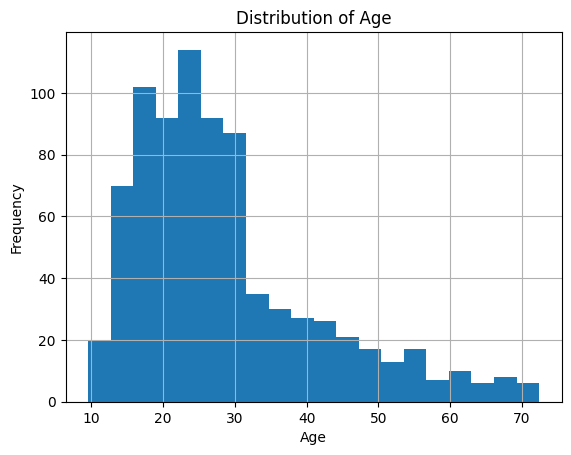

In [92]:
# Age distribution
df['age'].hist(bins=20)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


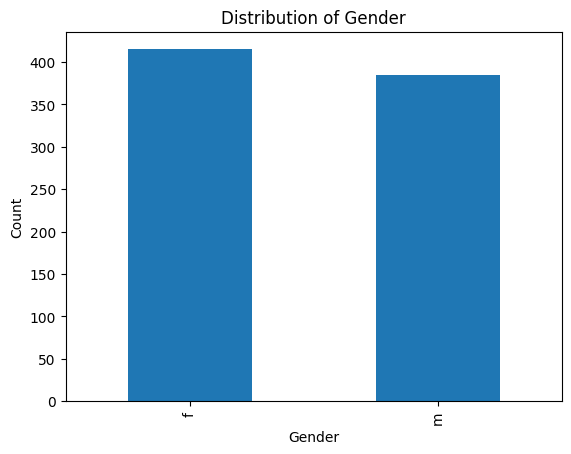

In [93]:
# Gender distribution
df['gender'].value_counts().plot(kind='bar')
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


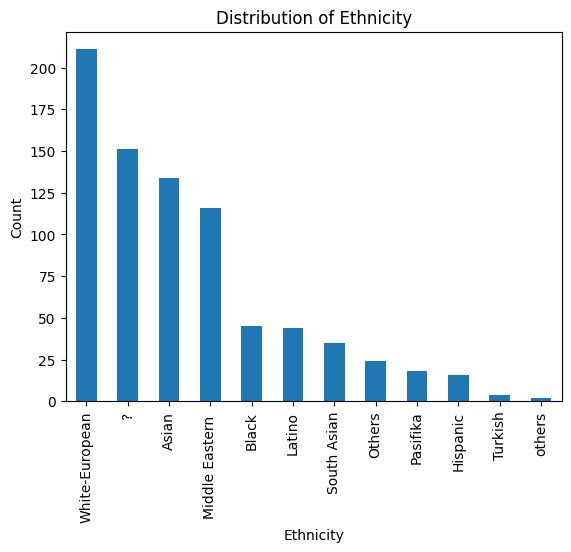

In [94]:
# Ethnicity distribution
df['ethnicity'].value_counts().plot(kind='bar')
plt.title('Distribution of Ethnicity')
plt.xlabel('Ethnicity')
plt.ylabel('Count')
plt.show()


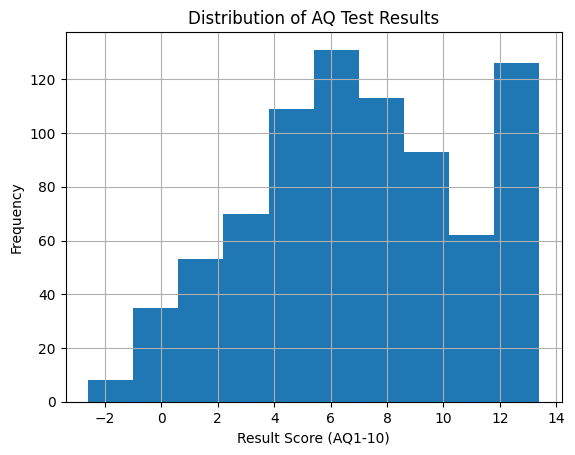

In [95]:
# Result distribution
df['result'].hist(bins=10)
plt.title('Distribution of AQ Test Results')
plt.xlabel('Result Score (AQ1-10)')
plt.ylabel('Frequency')
plt.show()


#Correlation Analysis
###Use a correlation matrix to analyze the relationship between numerical features like A1_Score to A10_Score, age, result, and Class/ASD.

In [96]:
# # Correlation matrix

# import seaborn as sns
# import matplotlib.pyplot as plt
# sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
# plt.title('Correlation Matrix of Numerical Features')
# plt.show()


#Gender and Autism
###Analyze the distribution of Class/ASD across gender to see if there's any significant difference.

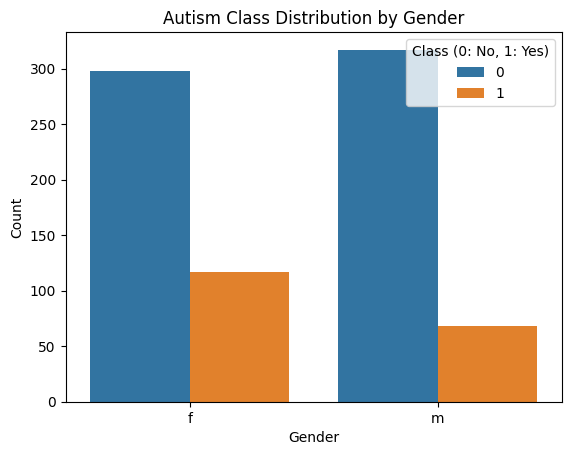

In [97]:
# Gender vs Autism Class
sns.countplot(x='gender', hue='Class/ASD', data=df)
plt.title('Autism Class Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Class (0: No, 1: Yes)')
plt.show()


#Jaundice and Autism
###Investigate if there's any correlation between patients who had jaundice and their likelihood of being classified as autistic.

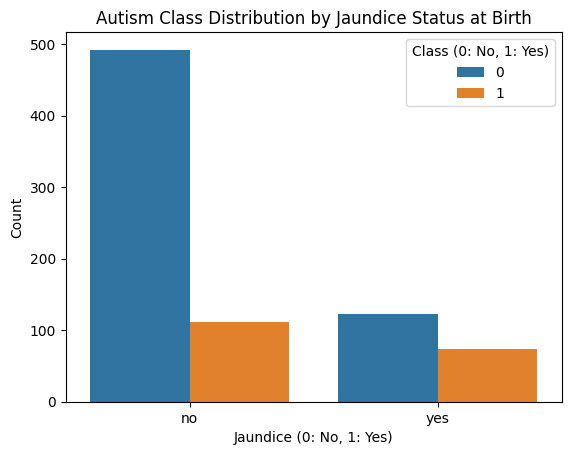

In [98]:
# Jaundice vs Autism Class
sns.countplot(x='jaundice', hue='Class/ASD', data=df)
plt.title('Autism Class Distribution by Jaundice Status at Birth')
plt.xlabel('Jaundice (0: No, 1: Yes)')
plt.ylabel('Count')
plt.legend(title='Class (0: No, 1: Yes)')
plt.show()


#Ethnicity and Autism
###Analyze if autism prevalence varies across ethnic groups

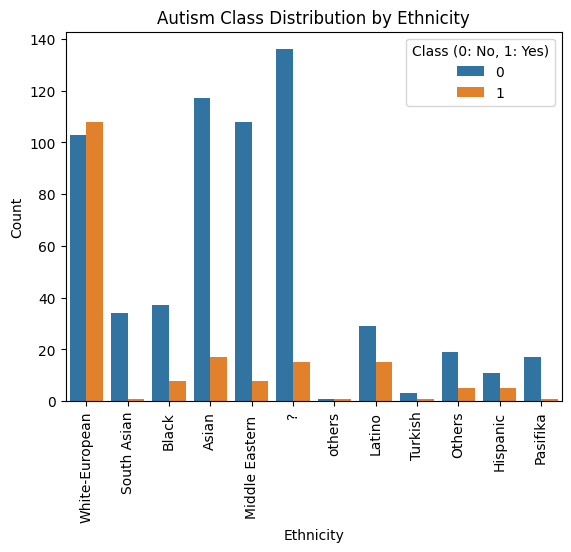

In [99]:
# Ethnicity vs Autism Class
sns.countplot(x='ethnicity', hue='Class/ASD', data=df)
plt.title('Autism Class Distribution by Ethnicity')
plt.xlabel('Ethnicity')
plt.ylabel('Count')
plt.legend(title='Class (0: No, 1: Yes)')
plt.xticks(rotation=90)
plt.show()


#Previous Screening Tests
###Check if undergoing a screening test before (used_app_before) affects the Class/ASD classification

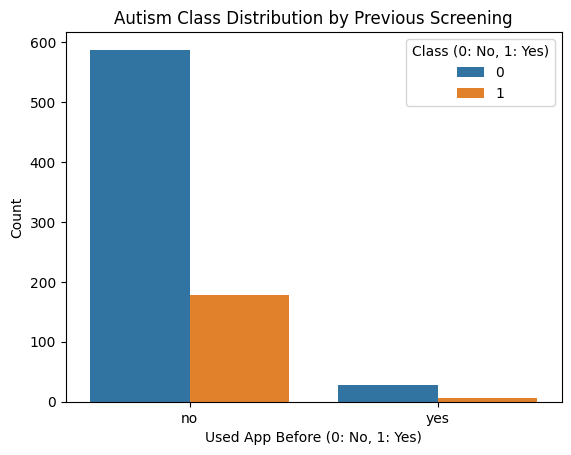

In [100]:
# Screening test before vs Autism Class
sns.countplot(x='used_app_before', hue='Class/ASD', data=df)
plt.title('Autism Class Distribution by Previous Screening')
plt.xlabel('Used App Before (0: No, 1: Yes)')
plt.ylabel('Count')
plt.legend(title='Class (0: No, 1: Yes)')
plt.show()


#Relation of the Person Who Completed the Test
###Analyze the relation column to see if the relation of the person filling out the form (e.g., parent, self) has any impact on the results

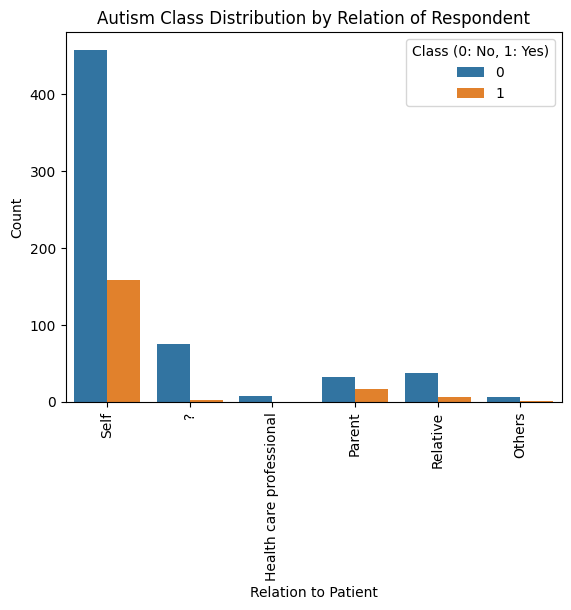

In [101]:
# Relation vs Autism Class
sns.countplot(x='relation', hue='Class/ASD', data=df)
plt.title('Autism Class Distribution by Relation of Respondent')
plt.xlabel('Relation to Patient')
plt.ylabel('Count')
plt.legend(title='Class (0: No, 1: Yes)')
plt.xticks(rotation=90)
plt.show()


# Multivariate Analysis
###Explore relationships between multiple features and the target variable to identify potential interactions.

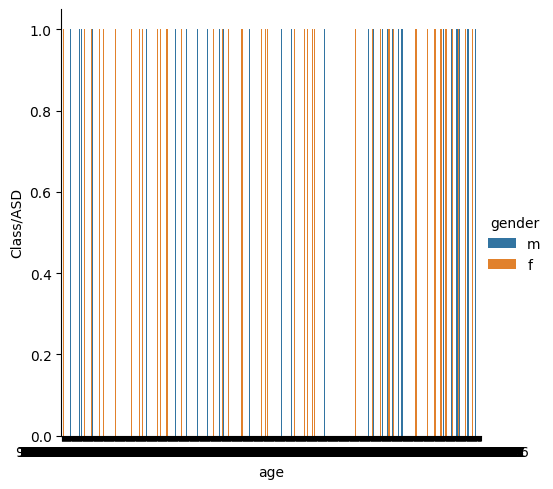

In [102]:
# Example: Age and Gender vs Class
sns.catplot(x='age', y='Class/ASD', hue='gender', data=df, kind='bar')


#Outliers Detection
###Look for outliers in numerical columns like age and result, which might impact your model's performance.

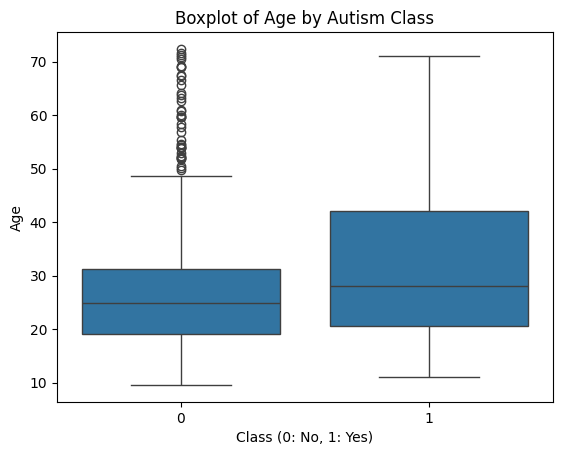

In [103]:
# Boxplot to detect outliers in age
sns.boxplot(x='Class/ASD', y='age', data=df)
plt.title('Boxplot of Age by Autism Class')
plt.xlabel('Class (0: No, 1: Yes)')
plt.ylabel('Age')
plt.show()


# Here we are going to prform conversion of objects to integer using various encoding techniques as follows

In [104]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
import pandas as pd
df.columns

Index(['ID', 'A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score',
       'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age',
       'gender', 'ethnicity', 'jaundice', 'austim', 'contry_of_res',
       'used_app_before', 'result', 'age_desc', 'relation', 'Class/ASD'],
      dtype='object')

In [105]:
# Define ordinal categories for 'age_desc' column (if applicable)
age_desc_categories = ['Infant', 'Toddler', 'Child', 'Teenager', 'Adult','18 and more']

# Updated Column Transformer (based on actual column names)
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(), ['gender', 'ethnicity', 'jaundice', 'austim', 'used_app_before', 'relation', 'contry_of_res']),
        ('ordinal', OrdinalEncoder(categories=[age_desc_categories],handle_unknown='use_encoded_value', unknown_value=-1), ['age_desc'])
    ],
    remainder='passthrough'  # Keep other columns unchanged
)

In [106]:
print(df['age_desc'].unique())

['18 and more']


In [107]:
# Features (X) and Target (y)
X = df.drop(columns=['Class/ASD'])
y = df['Class/ASD']


In [108]:
# Transform the data
X_transformed = preprocessor.fit_transform(df)

# Convert the transformed data into a dense matrix (if it's sparse)
X_dense = X_transformed.toarray() if hasattr(X_transformed, 'toarray') else X_transformed

# Convert the dense matrix to a DataFrame
# Get the column names from the OneHotEncoder and OrdinalEncoder
onehot_columns = preprocessor.named_transformers_['onehot'].get_feature_names_out(['gender', 'ethnicity', 'jaundice', 'austim', 'used_app_before', 'relation', 'contry_of_res'])
ordinal_columns = ['age_desc']

# Get the original column names that were not transformed (i.e., numerical columns)
passthrough_columns = df.drop(columns=['gender', 'ethnicity', 'jaundice', 'austim', 'used_app_before', 'relation', 'contry_of_res', 'age_desc']).columns

# Create a DataFrame with the transformed columns
df = pd.DataFrame(X_dense, columns=list(onehot_columns) + ordinal_columns + list(passthrough_columns))

# Display the modified dataframe
print(df.head())
X_transformed.shape

   gender_f  gender_m  ethnicity_?  ethnicity_Asian  ethnicity_Black  \
0       1.0       0.0          0.0              0.0              0.0   
1       1.0       0.0          0.0              0.0              0.0   
2       1.0       0.0          0.0              0.0              0.0   
3       1.0       0.0          0.0              0.0              0.0   
4       0.0       1.0          0.0              0.0              1.0   

   ethnicity_Hispanic  ethnicity_Latino  ethnicity_Middle Eastern   \
0                 0.0               0.0                        0.0   
1                 0.0               0.0                        0.0   
2                 0.0               0.0                        0.0   
3                 0.0               0.0                        0.0   
4                 0.0               0.0                        0.0   

   ethnicity_Others  ethnicity_Pasifika  ...  A4_Score  A5_Score  A6_Score  \
0               0.0                 0.0  ...       1.0       1.0    

(800, 102)

In [109]:
corr_matrix = df.corr()


In [110]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [111]:
def evaluate_models(X, y):
    # Define the models to evaluate
    models = {
        'Logistic Regression': LogisticRegression(max_iter=1000),
        'Decision Tree': DecisionTreeClassifier(),
        'Random Forest': RandomForestClassifier(),
        'Support Vector Classifier': SVC(probability=True),
        'Gradient Boosting': GradientBoostingClassifier()
    }

    results = {}

    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    for model_name, model in models.items():
        print(f"Training {model_name}...")
        model.fit(X_train, y_train)  # Fit the model
        y_pred = model.predict(X_test)  # Make predictions

        # Calculate accuracy
        accuracy = accuracy_score(y_test, y_pred)
        results[model_name] = accuracy  # Store accuracy in results dictionary

    return results

In [112]:
results = evaluate_models(df.drop(columns=['Class/ASD']), df['Class/ASD'])
print(results)


Training Logistic Regression...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training Decision Tree...
Training Random Forest...
Training Support Vector Classifier...
Training Gradient Boosting...
{'Logistic Regression': 0.81875, 'Decision Tree': 0.7875, 'Random Forest': 0.84375, 'Support Vector Classifier': 0.75625, 'Gradient Boosting': 0.80625}


In [113]:
# here random forest performs well!!!

# Lets test on our test dataset provided by kaggle


In [123]:
test_df = pd.read_csv('test.csv')
test_df.shape

(200, 21)

In [115]:
print(X_transformed.shape)
y.shape

(800, 102)


(800,)

In [116]:
model = RandomForestClassifier()
model.fit(X_transformed, y)

RandomForestClassifier()

In [127]:
categorical_cols = ['gender', 'ethnicity', 'jaundice', 'contry_of_res', 'used_app_before', 'age_desc', 'relation']
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

In [128]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ]
)

In [129]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the preprocessor on the training data and transform it
X_train_transformed = preprocessor.fit_transform(X_train)

# Initialize and train the Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train_transformed, y_train)

# Now apply the same preprocessing to your test_df
X_test_transformed = preprocessor.transform(test_df)

# Check the shape of the transformed test data to ensure it matches the training data's feature count
print(f"Shape of transformed test data: {X_test_transformed.shape}")

Shape of transformed test data: (200, 96)


In [136]:
# Make predictions on the test data
y_pred = model.predict(X_test_transformed)

# Output predictions
print("Predictions on test dataset:", y_pred)
y_pred.shape
y_valid.shape

Predictions on test dataset: [0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 1 1 0 1 1 0 0 0 0
 1 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0]


(160,)

In [138]:
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

In [139]:
# Fit the model on training data
model.fit(X_train_transformed, y_train)

# Transform the validation set and predict
X_valid_transformed = preprocessor.transform(X_valid)
y_valid_pred = model.predict(X_valid_transformed)
y_valid_prob = model.predict_proba(X_valid_transformed)[:, 1]  # For AUROC, use predicted probabilities

# Accuracy
accuracy = accuracy_score(y_valid, y_valid_pred)
print(f"Accuracy: {accuracy}")

# Precision, Recall, F1 Score
precision = precision_score(y_valid, y_valid_pred)
recall = recall_score(y_valid, y_valid_pred)
f1 = f1_score(y_valid, y_valid_pred)
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_valid, y_valid_pred)
print(f"Confusion Matrix:\n{conf_matrix}")

# AUROC Score
auroc = roc_auc_score(y_valid, y_valid_prob)
print(f"AUROC: {auroc}")

# Classification Report (includes precision, recall, f1-score, support)
print("Classification Report:\n", classification_report(y_valid, y_valid_pred))


Accuracy: 0.85625
Precision: 0.7
Recall: 0.717948717948718
F1 Score: 0.7088607594936709
Confusion Matrix:
[[109  12]
 [ 11  28]]
AUROC: 0.8956346683619409
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.90      0.90       121
           1       0.70      0.72      0.71        39

    accuracy                           0.86       160
   macro avg       0.80      0.81      0.81       160
weighted avg       0.86      0.86      0.86       160



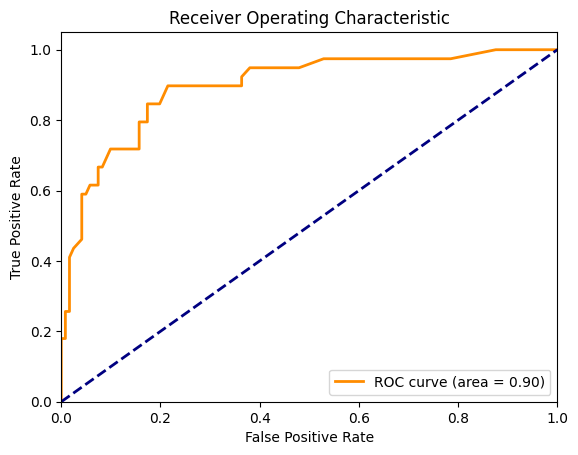

In [140]:
# Plotting ROC Curve
fpr, tpr, thresholds = roc_curve(y_valid, y_valid_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()